In [3]:
%load_ext autoreload
%autoreload 2

import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything
from torchvision import transforms
from torchvision.datasets import MNIST
os.chdir("/nfs/homedirs/schwienb/project-4")

In [4]:
from src.data.fashionmnist import FashionMNISTDataModule
from src.models.bg_aug_pixelcnn import BgAugPixelCNN
from src.models.pixelcnn import PixelCNN
from src.experiments.experiment import Experiment
from src.utils.pixelcnn import generate_images, draw_likelihood_plot, positionalencoding2d
from src.utils.ood_test import plot_roc_auc, test_ood
import torch.nn.functional as F
from src.models.coco_pixelcnn import COCOPixelCNN
from src.data.coco import COCODataModule

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)


42

In [6]:
experiment_name = 'PixelCNN_BgAugRandom_S_D32_G_COCO_1'

In [7]:
exp = Experiment(experiment_name)

In [8]:
# exp._setup()
exp.load()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [9]:
exp.dataset.rand_normal_bg

True

## Pixel Likelihood

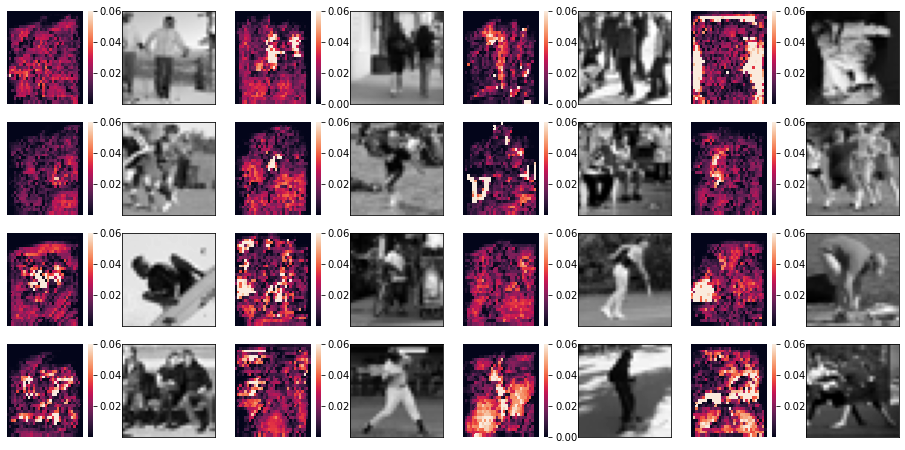

In [14]:
draw_likelihood_plot(exp.dataset.test_dataloader(), exp.model, cmap="rocket", vmax=0.06, img_index=0)

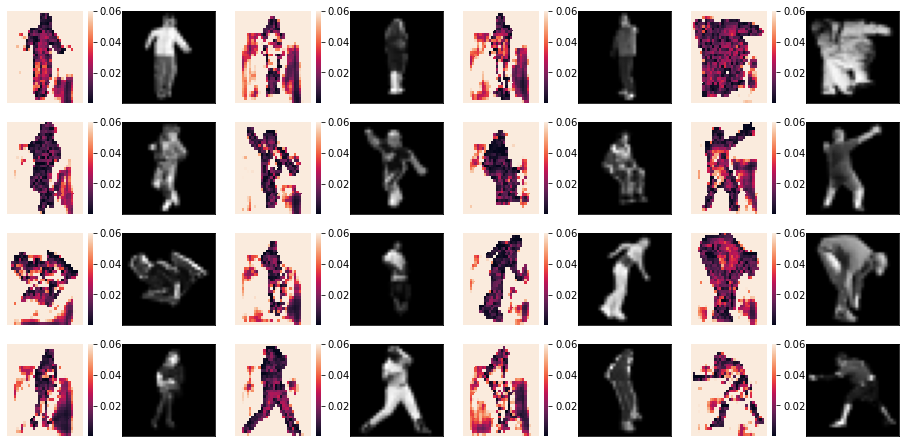

In [15]:
draw_likelihood_plot(exp.dataset.test_dataloader(), exp.model, cmap="rocket", vmax=0.06, img_index=1)

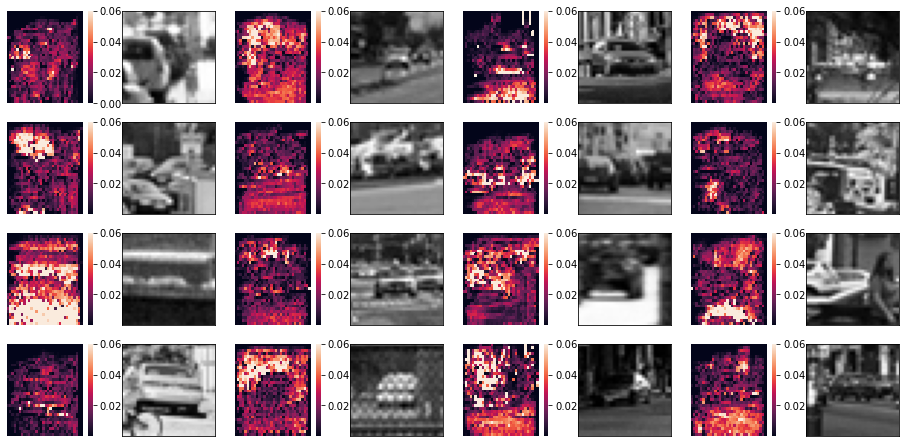

In [16]:
dataset_params = {
    'foreground_data_dir': '/nfs/students/winter-term-2020/project-4/yurtkulus/project-4/data/COCO/foreground_images/car', 
    'background_data_dir': '/nfs/students/winter-term-2020/project-4/yurtkulus/project-4/data/COCO/background_images/car', 
    'batch_size': 64,
    'convert_grayscale': True,
    'resize': True,
    'background_only': False,
    'rand_bg': True
}
car = COCODataModule(**dataset_params)
car.prepare_data()
car.setup()

car_test = car.test_dataloader()
draw_likelihood_plot(car_test, exp.model, cmap="rocket", vmax=0.06, img_index=0)

## Generated images

/nfs/homedirs/schwienb/project-4/src/utils/pixelcnn.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(out[:, :, i, j]).data


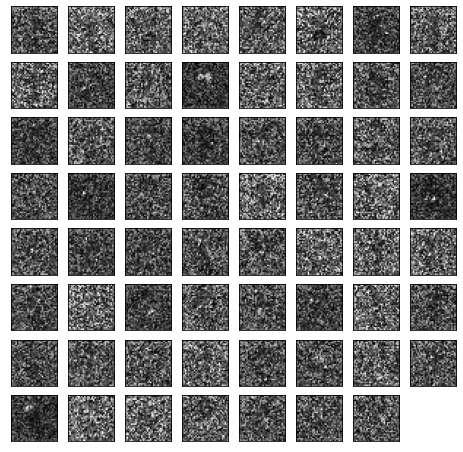

In [10]:
generate_images(exp.model, channels=1, img_dim=(32,32))